###  HIGH DYNAMIC RANGE

First, it requires multiple shots of the same scene (stationary) but with different exposure times. You need a tripod or support to make sure the camera does not move at all. 

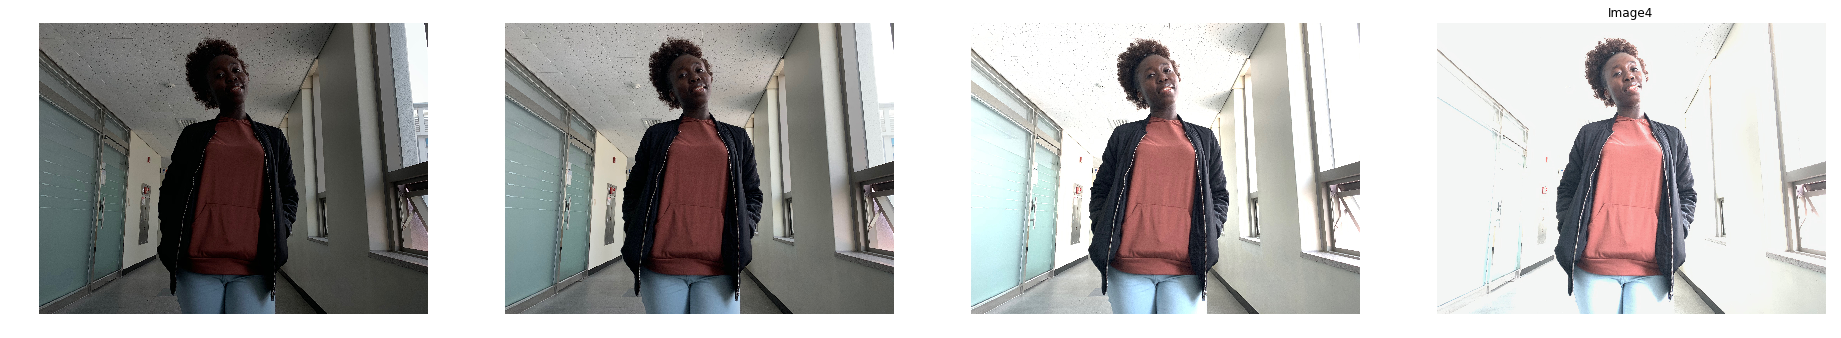

In [82]:
#importing libraries
from PIL import Image
from pylab import *
import cv2
#Display original images
img1 = array(Image.open('mycvdata/image1.JPG'))
img2 = array(Image.open('mycvdata/image2.JPG'))
img3 = array(Image.open('mycvdata/image3.JPG'))
img4 = array(Image.open('mycvdata/image4.JPG'))             
fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(img1)
axs[0].axis('off')
axs[1].imshow(img2)
axs[1].axis('off')
axs[2].imshow(img3)
axs[2].axis('off')
axs[3].imshow(img4)
axs[3].axis('off')
title("Image4")
show()

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Loading images into list
files = ["mycvdata/image1.JPG", "mycvdata/image2.JPG", "mycvdata/image3.JPG", "mycvdata/image4.JPG"] 
images = list([cv2.imread(f) for f in files])
# Compute the exposure times in seconds
exposure_times  = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32)


In [70]:
# Compute the response curve
print("Calculating Camera Response Function (CRF) ... ")
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, exposure_times) 

Calculating Camera Response Function (CRF) ... 


Merging images into one HDR image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


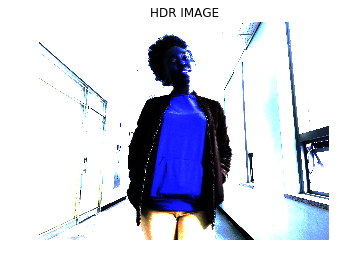

In [84]:
# Merge images into an HDR linear image
print("Merging images into one HDR image")
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, exposure_times, responseDebevec)
cv2.imwrite("hdrDebevec.jpg", hdrDebevec)
plt.imshow(hdrDebevec)
plt.axis('off')
plt.title("HDR IMAGE")
plt.show()  

In [77]:
#Plotting Histogram
def histeq(hdrDebevec,nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    imhist,bins = histogram(hdrDebevec.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(hdrDebevec.flatten(),bins[:-1],cdf)
    return im2.reshape(hdrDebevec.shape), cdf

C:\Users\WIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


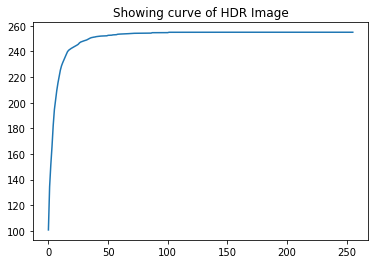

In [75]:
im2,cdf = histeq(hdrDebevec)
figure()
plot(cdf)
title("Showing curve of HDR Image")
show()


Tonemaping using Drago's method ... 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


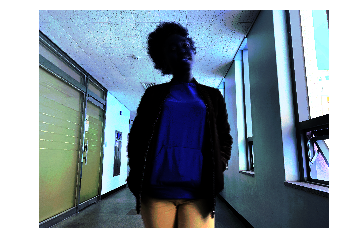

In [62]:
# Tonemap using Drago's method to obtain 24-bit color image
print("Tonemaping using Drago's method ... ")
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
plt.imshow(ldrDrago)
plt.axis('off')
plt.show()

Tonemaping using Durand's method ... 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


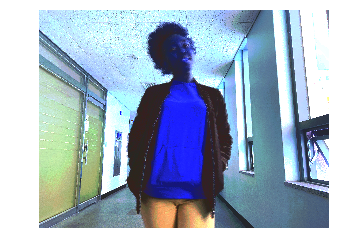

In [85]:
# Tonemap using Durand's method obtain 24-bit color image
print("Tonemaping using Durand's method ... ")
tonemapDurand = cv2.createTonemapDurand(1.5,4,1.0,1,1)
ldrDurand = tonemapDurand.process(hdrDebevec)
ldrDurand = 3 * ldrDurand
cv2.imwrite("ldr-Durand.jpg", ldrDurand * 255)
plt.imshow(ldrDurand)
plt.axis('off')
plt.show()

Tonemaping using Reinhard's method ... 


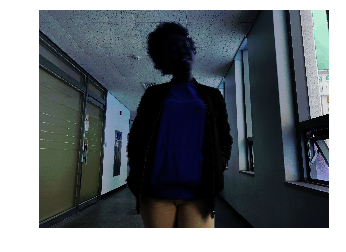

In [86]:
# Tonemap using Reinhard's method to obtain 24-bit color image
print("Tonemaping using Reinhard's method ... ")
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)
plt.imshow(ldrReinhard)
plt.axis('off')
plt.show()

Tonemaping using Mantiuk's method ... 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


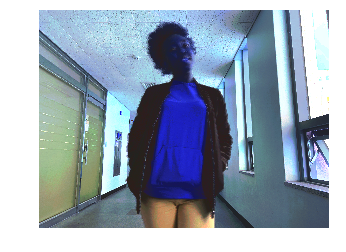

In [88]:
# Tonemap using Mantiuk's method to obtain 24-bit color image
print("Tonemaping using Mantiuk's method ... ")
tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk
cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)
plt.imshow(ldrMantiuk)
plt.axis('off')
plt.show()